In [1]:
# PyTorch Variable demo
# 导入模块
# -*- coding: utf-8 -*-
import torch as T
from torch.autograd import Variable

In [3]:
# Variabel会放入一个计算图，然后进行前向传播，反向传播以及自动求导
# 一个Variable里面包含着三个属性，data，grad和creator，
# 其中creator表示得到这个Variabel的操作，比如乘法或者加法等等，
# grad表示方向传播的梯度，data表示取出这个Variabel里面的数据

# requires_grad 表示是否对其求梯度，默认是True
x = Variable(T.Tensor([3]), requires_grad=True)
y = Variable(T.Tensor([5]), requires_grad=True)
print(x)
print(y)

tensor([3.], requires_grad=True)
tensor([5.], requires_grad=True)


In [4]:
z = x * x * x + 3 * y + 4

# 对x和y分别求导
print(z.backward())

None


In [5]:
# x的导数和y的导数
print('dz/dx:{}'.format(x.grad.data))
print('dz/dy:{}'.format(y.grad.data))

dz/dx:tensor([27.])
dz/dy:tensor([3.])


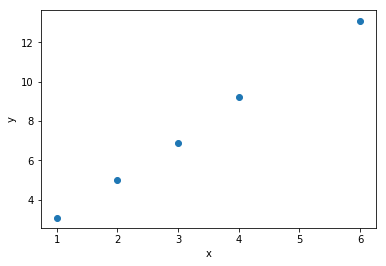

In [9]:
# 线性回归示例
# 数据
x_data = [1.0, 2.0, 3.0, 4.0, 6.0]
y_data = [3.1, 5.0, 6.9, 9.2, 13.1]

# 绘制散点图
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
w = Variable(T.Tensor([0.0]), requires_grad=True)
b = Variable(T.Tensor([0.0]), requires_grad=True)

In [12]:
# forward computation
def forward(x):
    return x * w + b

In [13]:
# define the loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

In [14]:
# before training
print("predict(before training)", 5, forward(5).data[0])

predict(before training) 5 tensor(0.)


In [15]:
eta = 0.01
for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        print(l)
        l.backward()
        print("\tgrad:", x_val, y_val, w.grad.data)
        w.data = w.data - eta * w.grad.data
        b.data = b.data - eta * b.grad.data

        # manually set the gradient to zero after updating weight, bias
        w.grad.data.zero_()
        b.grad.data.zero_()

    print("progress: ", epoch, l.data[0])

tensor([9.6100], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-6.2000])
tensor([23.1746], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-19.2560])
tensor([35.7370], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([-35.8682])
tensor([41.8504], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-51.7535])
tensor([34.9058], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([-70.8973])
progress:  0 tensor(34.9058)
tensor([0.5400], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-1.4697])
tensor([0.5640], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-3.0041])
tensor([0.4781], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([-4.1486])
tensor([0.8596], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-7.4174])
tensor([0.2618], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([-6.1396])
progress:  1 tensor(0.2618)
tensor([0.1943], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.8815])
tensor([0.0639], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-1.0110])
tensor([0.0022], grad_fn=<MulBackward0>)
	gra

	grad: 4.0 9.2 tensor([-1.3095])
tensor([0.0219], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([1.7740])
progress:  24 tensor(0.0219)
tensor([0.0689], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.5250])
tensor([0.0075], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-0.3463])
tensor([0.0083], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.5459])
tensor([0.0268], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-1.3101])
tensor([0.0210], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([1.7401])
progress:  25 tensor(0.0210)
tensor([0.0666], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.5161])
tensor([0.0070], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-0.3336])
tensor([0.0086], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.5555])
tensor([0.0268], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-1.3108])
tensor([0.0202], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([1.7071])
progress:  26 tensor(0.0202)
tensor([0.0643], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.5

	grad: 1.0 3.1 tensor([-0.3635])
tensor([0.0009], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-0.1178])
tensor([0.0143], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.7182])
tensor([0.0273], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-1.3216])
tensor([0.0091], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([1.1456])
progress:  48 tensor(0.0091)
tensor([0.0321], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.3583])
tensor([0.0008], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-0.1104])
tensor([0.0146], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.7238])
tensor([0.0273], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-1.3220])
tensor([0.0088], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([1.1264])
progress:  49 tensor(0.0088)
tensor([0.0312], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.3532])
tensor([0.0007], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([-0.1032])
tensor([0.0148], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.7293])
tensor([0.0273], grad_fn

progress:  73 tensor(0.0042)
tensor([0.0170], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.2605])
tensor([4.8573e-05], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([0.0279])
tensor([0.0190], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.8281])
tensor([0.0276], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-1.3289])
tensor([0.0041], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([0.7665])
progress:  74 tensor(0.0041)
tensor([0.0166], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.2577])
tensor([6.3595e-05], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([0.0319])
tensor([0.0192], grad_fn=<MulBackward0>)
	grad: 3.0 6.9 tensor([0.8312])
tensor([0.0276], grad_fn=<MulBackward0>)
	grad: 4.0 9.2 tensor([-1.3291])
tensor([0.0040], grad_fn=<MulBackward0>)
	grad: 6.0 13.1 tensor([0.7561])
progress:  75 tensor(0.0040)
tensor([0.0162], grad_fn=<MulBackward0>)
	grad: 1.0 3.1 tensor([-0.2549])
tensor([8.0201e-05], grad_fn=<MulBackward0>)
	grad: 2.0 5.0 tensor([0.0358])
tensor([0.0193], g

In [16]:
print(w.data, b.data)

tensor([2.0229]) tensor([0.9748])


In [17]:
print("predict(atfer training)", 5, forward(5).data[0])

predict(atfer training) 5 tensor(11.0894)


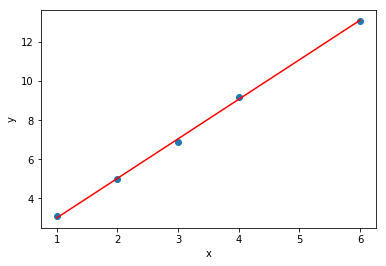

In [19]:
# 绘制拟合的直线
import numpy as np
plt.scatter(x_data, y_data)
x = np.linspace(1, 6, 100)
y = w.data.numpy()[0] * x + b.data.numpy()[0]
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()